In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns

In [11]:
# Load datasets

plants_df = pd.read_csv('../data/dataset_edible_plants.csv')
weather_df = pd.read_csv('../data/dataset_weather.csv')

In [12]:
weather_df

,UNIXTimestamp,Location,LocationKoppenGeigerClassification,AirTemperatureCelsius,AirPressure_hPa,WindSpeed_kmh,WindDirection_deg,Humidity_percent,CloudCoverage_percent,Precipitation_mm
0,1672524000,Airstrip One,Af,27.941921,1026.522945,11.299696,48.197129,93.292156,69.876469,0.283086
1,1672610400,Airstrip One,Af,27.585284,1006.617087,21.030866,58.767936,101.558369,94.675106,7.546799
2,1672696800,Airstrip One,Af,29.547875,1005.676839,16.585643,197.157168,94.418553,73.255659,6.924607
3,1672783200,Airstrip One,Af,29.328846,1013.190731,7.329083,109.896105,95.669383,77.008149,2.144308
4,1672869600,Airstrip One,Af,23.988730,1010.705085,13.229805,153.633956,101.999035,95.997104,3.103873
...,...,...,...,...,...,...,...,...,...,...
3645,1703628000,Prole District,ET,-7.621098,1010.106098,21.348198,267.203910,48.572941,42.864706,1.179225
3646,1703714400,Prole District,ET,-11.122707,1004.032517,12.604921,210.712372,45.078644,25.393222,0.259620
3647,1703800800,Prole District,ET,-20.153963,1001.831065,7.010456,271.742991,48.354019,41.770093,2.452235
3648,1703887200,Prole District,ET,-14.995727,1024.862696,7.577397,111.900508,46.961285,34.806424,2.039002


In [13]:
plants_df

,Name,Latin Name,Growth Climate,Watering Needs,Time to Consumable (days),Weight when Full Grown (kg),Kcal per 100g,Proteins per 100g (g)
0,Apple,Malum vulgaris,Temperate,Moderate,83,3.04,256.9,7.9
1,Banana,Musa minor,Mediterranean,High,181,4.85,26.1,7.9
2,Mango,Mangifera vulgaris,Arid,Moderate,352,2.38,263.5,2.0
3,Orange,Citrus latifolia,Tropical,Moderate,296,4.70,13.4,9.2
4,Peach,Prunus sapiens,Polar,Low,182,0.26,286.1,7.2
...,...,...,...,...,...,...,...,...
233,Pansy,Pansy major,Temperate,High,71,1.45,278.8,8.9
234,Rose,Rose vulgaris,Tropical,Moderate,34,4.69,386.6,1.4
235,Safflower,Safflower sapiens,Arid,Moderate,313,2.07,29.3,1.6
236,Sunflower,Sunflower latifolia,Temperate,High,187,4.27,329.3,3.0


In [14]:
# Extract unique climate classifications
climate_types = weather_df['LocationKoppenGeigerClassification'].unique()
climate_types

array(['Af', 'Am', 'Aw', 'Cfb', 'Cfa', 'Csb', 'Csc', 'Dfb', 'Dfc', 'ET'],
      dtype=object)

In [15]:
climate_mapping = {
    # Tropical climates
    'Af': 'Tropical',     # Tropical rainforest
    'Am': 'Tropical',     # Tropical monsoon
    'Aw': 'Tropical',     # Tropical savanna
    
    # Arid climates
    'BWh': 'Arid',        # Hot desert
    'BWk': 'Arid',        # Cold desert 
    'BSh': 'Arid',        # Hot semi-arid
    'BSk': 'Arid',        # Cold semi-arid
    
    # Mediterranean
    'Csa': 'Mediterranean', # Mediterranean hot summer
    'Csb': 'Mediterranean', # Mediterranean warm summer
    'Csc': 'Mediterranean', # Mediterranean cold summer
    
    # Temperate
    'Cfa': 'Temperate',   # Humid subtropical
    'Cfb': 'Temperate',   # Oceanic
    'Cfc': 'Temperate',   # Subpolar oceanic
    'Dfa': 'Temperate',   # Humid continental hot summer
    'Dfb': 'Temperate',   # Humid continental warm summer
    'Dfc': 'Temperate',   # Subarctic (could be Polar in some cases)
    'Dfd': 'Temperate',   # Subarctic very cold winter
    
    # Polar
    'ET': 'Polar',        # Tundra
    'EF': 'Polar'         # Ice cap
}

# Create new column with mapped climate names
weather_df['ClimateType'] = weather_df['LocationKoppenGeigerClassification'].map(climate_mapping)

# Display unique values to verify mapping
print(weather_df[['Location', 'ClimateType']].drop_duplicates())

                Location    ClimateType
0           Airstrip One       Tropical
365     Victory Mansions       Tropical
730    Ministry of Truth       Tropical
1095    Ministry of Love      Temperate
1460   Ministry of Peace      Temperate
1825  Ministry of Plenty  Mediterranean
2190  Chestnut Tree Café  Mediterranean
2555      Golden Country      Temperate
2920  Outer Party Sector      Temperate
3285      Prole District          Polar


In [16]:
# find chestnut cafe location
chestnut_cafe = weather_df[weather_df['Location'] == 'Chestnut Tree Café']
chestnut_cafe

,UNIXTimestamp,Location,LocationKoppenGeigerClassification,AirTemperatureCelsius,AirPressure_hPa,WindSpeed_kmh,WindDirection_deg,Humidity_percent,CloudCoverage_percent,Precipitation_mm,ClimateType
2190,1672524000,Chestnut Tree Café,Csc,4.780569,1018.680735,10.042046,98.488511,76.950886,67.803543,0.916752,Mediterranean
2191,1672610400,Chestnut Tree Café,Csc,11.187958,1012.356622,6.591538,272.599784,65.798461,23.193846,0.330886,Mediterranean
2192,1672696800,Chestnut Tree Café,Csc,2.608569,1012.804274,16.048166,205.566971,79.116035,76.464142,9.159735,Mediterranean
2193,1672783200,Chestnut Tree Café,Csc,8.140164,1004.791955,14.959192,298.871136,68.222816,32.891264,1.545655,Mediterranean
2194,1672869600,Chestnut Tree Café,Csc,19.892429,1007.300370,13.174097,193.536725,72.853183,51.412731,2.751148,Mediterranean
...,...,...,...,...,...,...,...,...,...,...,...
2550,1703628000,Chestnut Tree Café,Csc,16.935337,999.168999,21.698590,216.185420,76.659228,66.636910,7.936585,Mediterranean
2551,1703714400,Chestnut Tree Café,Csc,5.562727,1001.178092,17.198252,288.407876,76.196510,64.786041,6.570286,Mediterranean
2552,1703800800,Chestnut Tree Café,Csc,15.609063,1000.716651,20.047387,238.502013,76.257529,65.030118,6.054015,Mediterranean
2553,1703887200,Chestnut Tree Café,Csc,7.937167,1027.362252,20.211125,285.570147,77.787358,71.149431,6.783687,Mediterranean


In [17]:
# Get unique locations and their climate types
locations = weather_df[['Location', 'ClimateType']].drop_duplicates()
# Convert to dictionary
locations_dict = locations.set_index('Location').to_dict()['ClimateType']
locations_dict

{'Airstrip One': 'Tropical',
 'Victory Mansions': 'Tropical',
 'Ministry of Truth': 'Tropical',
 'Ministry of Love': 'Temperate',
 'Ministry of Peace': 'Temperate',
 'Ministry of Plenty': 'Mediterranean',
 'Chestnut Tree Café': 'Mediterranean',
 'Golden Country': 'Temperate',
 'Outer Party Sector': 'Temperate',
 'Prole District': 'Polar'}

In [18]:
# Extract unique climate classifications
climate_types = weather_df['LocationKoppenGeigerClassification'].unique()

In [19]:
climate_types = plants_df['Growth Climate'].unique()
climate_types

array(['Temperate', 'Mediterranean', 'Arid', 'Tropical', 'Polar'],
      dtype=object)

In [20]:
# Create label encoders
climate_encoder = LabelEncoder()
plants_df['climate_code'] = climate_encoder.fit_transform(plants_df['Growth Climate'])

In [21]:
# Define a corrected compatibility function using only the available growth climates
def calculate_compatibility(plant_climate, location_climate):
    # Map Koppen climate classes to the available growth climates in plants_df
    koppen_to_growth = {
        # Tropical climates
        'Af': 'Tropical',     # Tropical rainforest
        'Am': 'Tropical',     # Tropical monsoon
        'Aw': 'Tropical',     # Tropical savanna
        
        # Arid climates
        'BWh': 'Arid',        # Hot desert
        'BWk': 'Arid',        # Cold desert 
        'BSh': 'Arid',        # Hot semi-arid
        'BSk': 'Arid',        # Cold semi-arid
        
        # Mediterranean
        'Csa': 'Mediterranean', # Mediterranean hot summer
        'Csb': 'Mediterranean', # Mediterranean warm summer
        'Csc': 'Mediterranean', # Mediterranean cold summer
        
        # Temperate
        'Cfa': 'Temperate',   # Humid subtropical
        'Cfb': 'Temperate',   # Oceanic
        'Cfc': 'Temperate',   # Subpolar oceanic
        'Dfa': 'Temperate',   # Humid continental hot summer
        'Dfb': 'Temperate',   # Humid continental warm summer
        'Dfc': 'Temperate',   # Subarctic (could be Polar in some cases)
        'Dfd': 'Temperate',   # Subarctic very cold winter
        
        # Polar
        'ET': 'Polar',        # Tundra
        'EF': 'Polar'         # Ice cap
    }
    
    location_growth_climate = koppen_to_growth.get(location_climate, 'Temperate')
    
    # Define climate compatibility relationships using only available climate types
    climate_compatibility = {
        'Tropical': {'Tropical': 10, 'Mediterranean': 5, 'Temperate': 4, 'Polar': 0, 'Arid': 3},
        'Mediterranean': {'Tropical': 5, 'Mediterranean': 10, 'Temperate': 7, 'Polar': 0, 'Arid': 6},
        'Temperate': {'Tropical': 3, 'Mediterranean': 7, 'Temperate': 10, 'Polar': 2, 'Arid': 4},
        'Polar': {'Tropical': 0, 'Mediterranean': 1, 'Temperate': 3, 'Polar': 10, 'Arid': 0},
        'Arid': {'Tropical': 2, 'Mediterranean': 5, 'Temperate': 3, 'Polar': 0, 'Arid': 10}
    }
    
    # Get base compatibility score
    base_score = climate_compatibility.get(plant_climate, {}).get(location_growth_climate, 3)
    
    # Special case adjustments
    if plant_climate == 'Mediterranean' and location_growth_climate == 'Arid':
        # Many Mediterranean plants are drought-tolerant
        base_score += 1
    elif plant_climate == 'Tropical' and location_growth_climate == 'Polar':
        # Tropical plants cannot survive in polar climates
        base_score = 0
        
    return base_score
        
# Create compatibility matrix
compatibility_matrix = {}
for climate in weather_df['LocationKoppenGeigerClassification'].unique():
    compatibility_matrix[climate] = {}
    for _, plant in plants_df.iterrows():
        compatibility_matrix[climate][plant['Name']] = calculate_compatibility(
            plant['Growth Climate'], climate)

# Convert to DataFrame for easier use
compatibility_df = pd.DataFrame(compatibility_matrix)

# Convert to DataFrame for easier use
compatibility_df = pd.DataFrame(compatibility_matrix)

<Axes: >

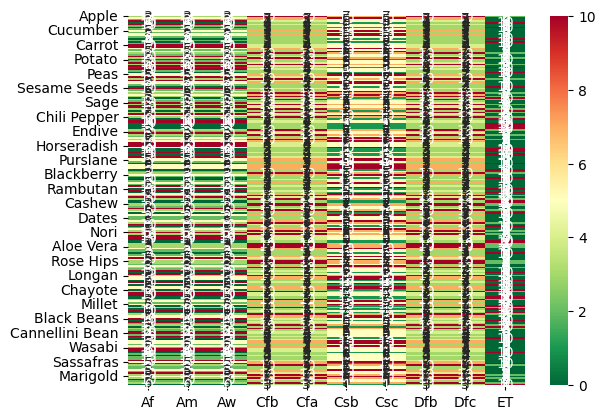

In [22]:
# plot heatmap of compatibility matrix
sns.heatmap(compatibility_df, cmap='RdYlGn_r', center=5, annot=True)

In [23]:
compatibility_df

,Af,Am,Aw,Cfb,Cfa,Csb,Csc,Dfb,Dfc,ET
Apple,3,3,3,10,10,7,7,10,10,2
Banana,5,5,5,7,7,10,10,7,7,0
Mango,2,2,2,3,3,5,5,3,3,0
Orange,10,10,10,4,4,5,5,4,4,0
Peach,0,0,0,3,3,1,1,3,3,10
...,...,...,...,...,...,...,...,...,...,...
Pansy,3,3,3,10,10,7,7,10,10,2
Rose,10,10,10,4,4,5,5,4,4,0
Safflower,2,2,2,3,3,5,5,3,3,0
Sunflower,3,3,3,10,10,7,7,10,10,2


In [25]:
compatibility_df.to_csv('../data/plants_weather_compatibilities.csv', index=False)

In [ ]:
compatibility_matrix

{'Af': {'Apple': 3,
  'Banana': 5,
  'Mango': 2,
  'Orange': 10,
  'Peach': 0,
  'Pear': 10,
  'Papaya': 2,
  'Pineapple': 0,
  'Watermelon': 2,
  'Cucumber': 5,
  'Tomato': 2,
  'Avocado': 5,
  'Spinach': 5,
  'Kale': 2,
  'Lettuce': 0,
  'Swiss Chard': 2,
  'Beet Greens': 0,
  'Radish': 2,
  'Carrot': 10,
  'Broccoli': 10,
  'Cauliflower': 5,
  'Cabbage': 2,
  'Brussels Sprouts': 5,
  'Zucchini': 3,
  'Squash': 2,
  'Pumpkin': 10,
  'Sweet Potato': 3,
  'Potato': 0,
  'Corn': 2,
  'Rice': 10,
  'Wheat': 3,
  'Barley': 10,
  'Oats': 0,
  'Quinoa': 10,
  'Lentils': 2,
  'Chickpeas': 0,
  'Peas': 5,
  'Beans': 5,
  'Soybeans': 10,
  'Almond': 3,
  'Walnut': 10,
  'Pecan': 5,
  'Hazelnut': 5,
  'Chestnut': 2,
  'Sunflower Seeds': 0,
  'Sesame Seeds': 10,
  'Flax Seeds': 2,
  'Chia Seeds': 5,
  'Basil': 3,
  'Mint': 5,
  'Parsley': 3,
  'Cilantro': 0,
  'Thyme': 3,
  'Rosemary': 2,
  'Sage': 10,
  'Dill': 3,
  'Tarragon': 10,
  'Oregano': 10,
  'Lavender': 3,
  'Lemon Balm': 0,
  'Fennel'